# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


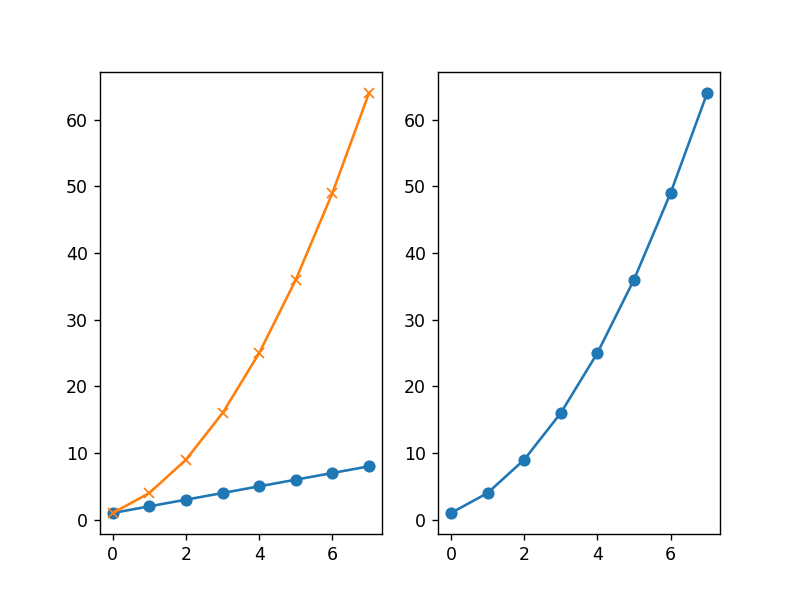

In [5]:
plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [6]:
exponential_data = linear_data**2

plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [7]:
plt.subplot(1,2,1)
plt.plot(exponential_data, '-x')

<ipython-input-7-d0513b446f5a>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


<IPython.core.display.Javascript object>


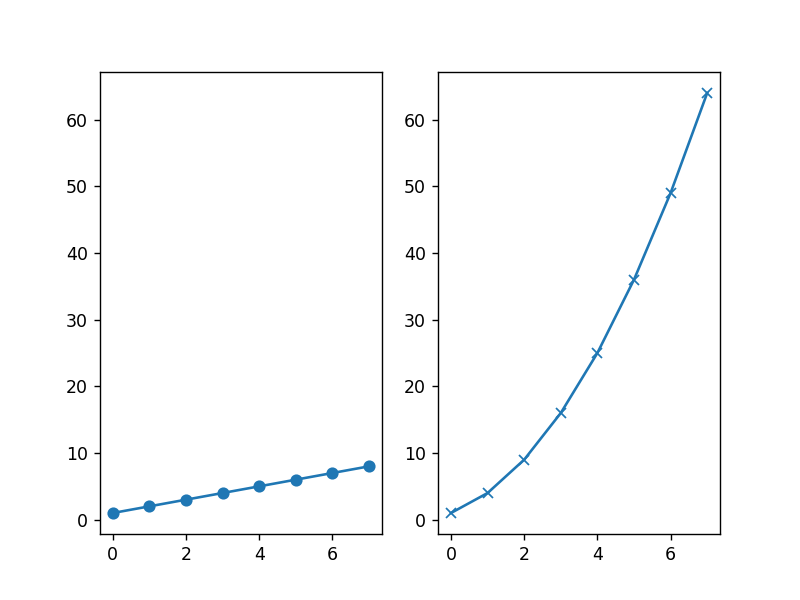

In [8]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


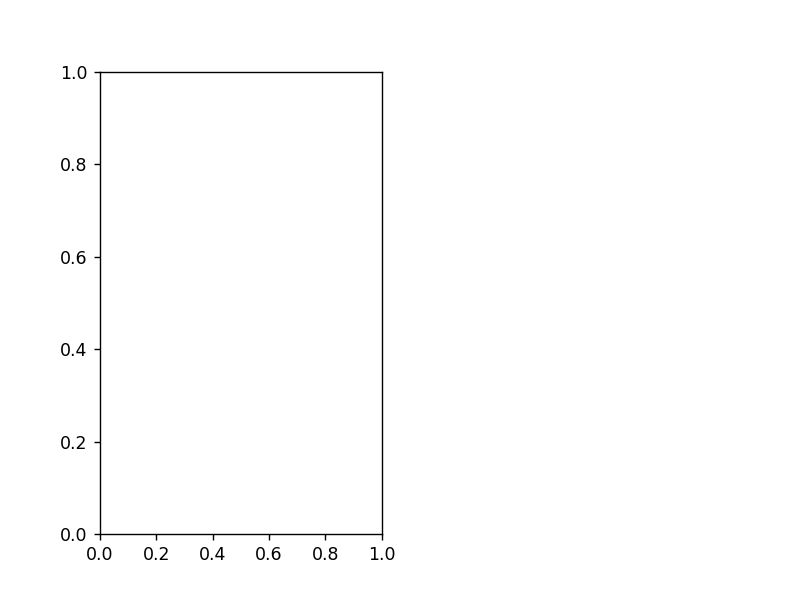

<ipython-input-9-63c864308456>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1) == plt.subplot(121)


True

In [9]:
plt.figure()
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


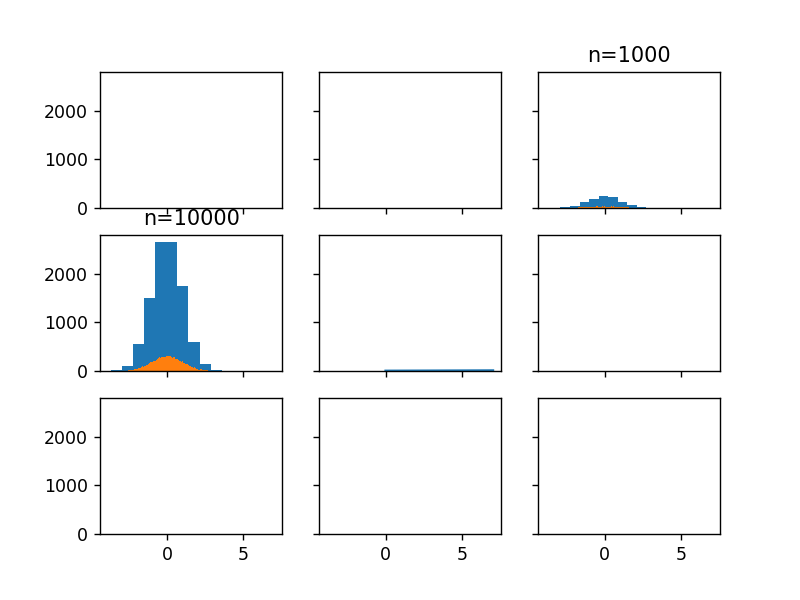

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,sharex=True, sharey=True)

ax5.plot(linear_data, '-')

In [17]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

# Histograms

<IPython.core.display.Javascript object>


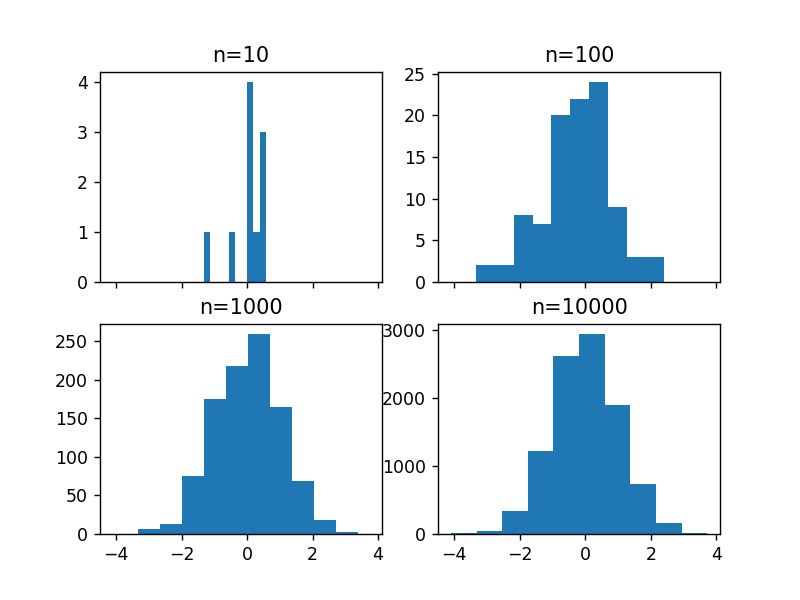

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


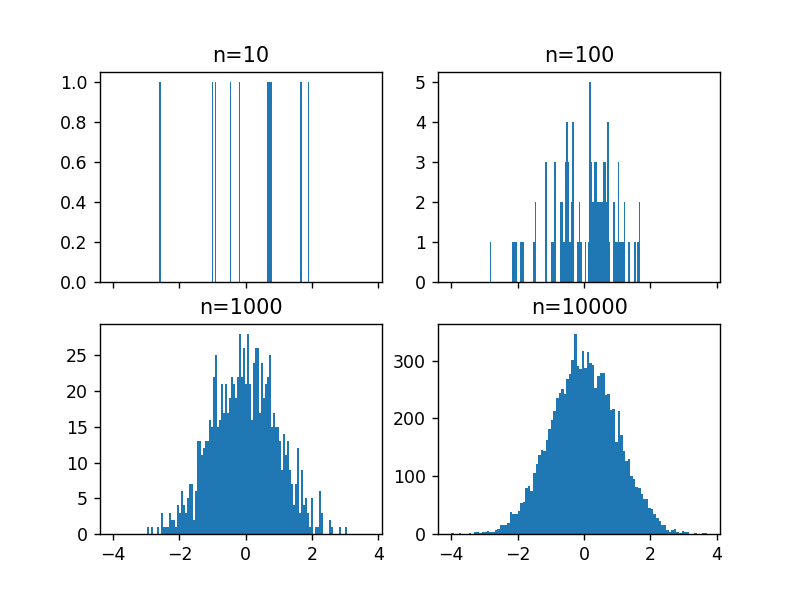

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


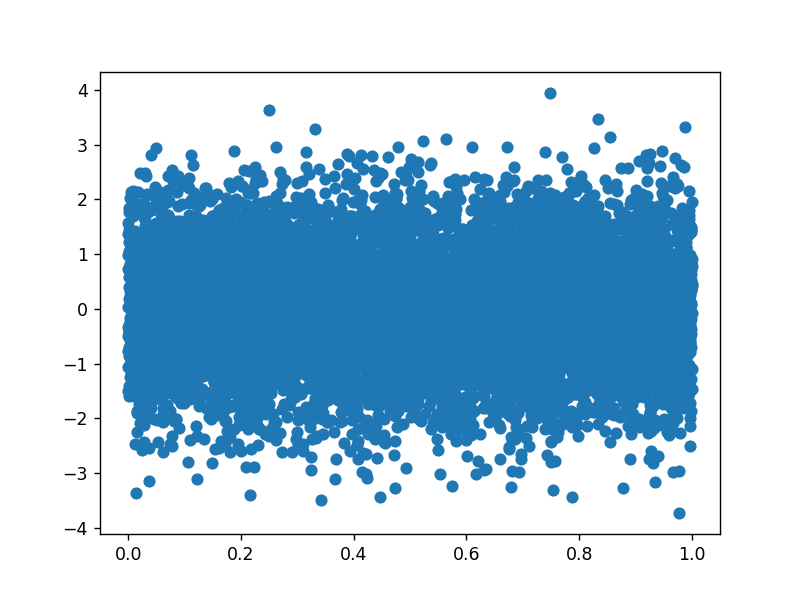

In [23]:
plt.figure()
y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)
plt.scatter(x,y)

<IPython.core.display.Javascript object>


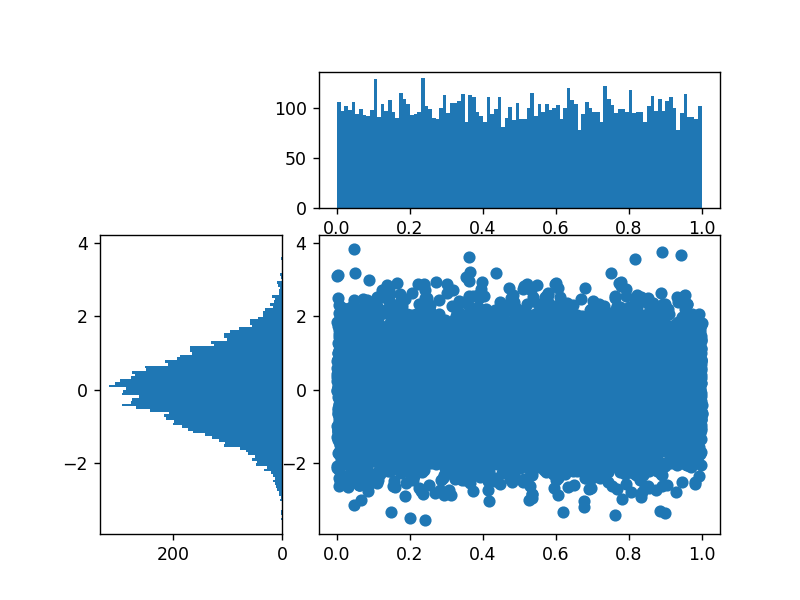

In [26]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [27]:
y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)
lower_right.scatter(x, y)
top_histogram.hist(x, bins=100)
s = side_histogram.hist(y, bins=100, orientation='horizontal')

In [30]:
top_histogram.clear()
top_histogram.hist(x, bins=100)
side_histogram.clear()
side_histogram.hist(y, bins=100, orientation='horizontal')

side_histogram.invert_xaxis()

# Box and Whisker Plots

In [33]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 'random': random_sample, 'gamma': gamma_sample})

In [34]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.009802,0.499627,2.015741
std,0.992309,0.289455,1.443771
min,-3.757844,0.000011,0.012693
25%,-0.680374,0.250229,0.963925
50%,0.002054,0.493428,1.689517
75%,0.653929,0.751013,2.697061
max,3.791052,0.999890,15.325130


<IPython.core.display.Javascript object>


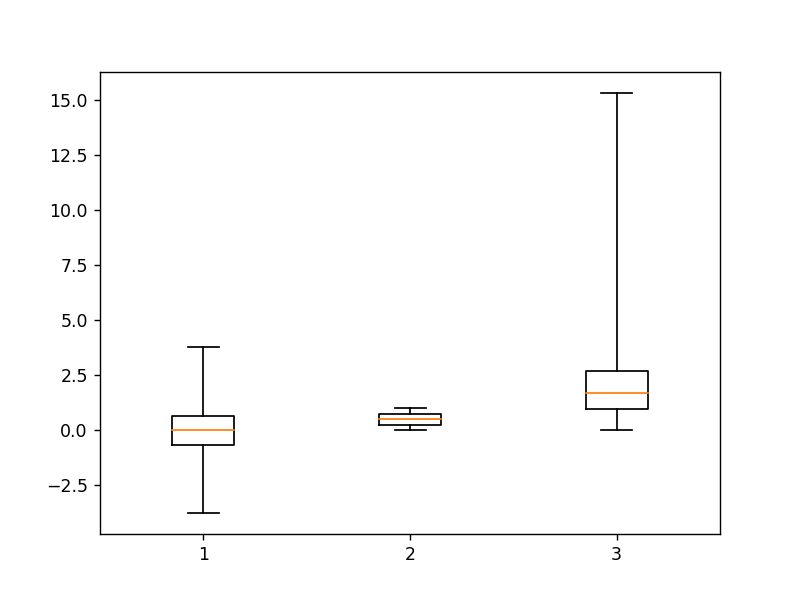

In [36]:
plt.figure()
_ = plt.boxplot(df['normal'], whis=[0,100])

In [40]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0, 100])

<IPython.core.display.Javascript object>


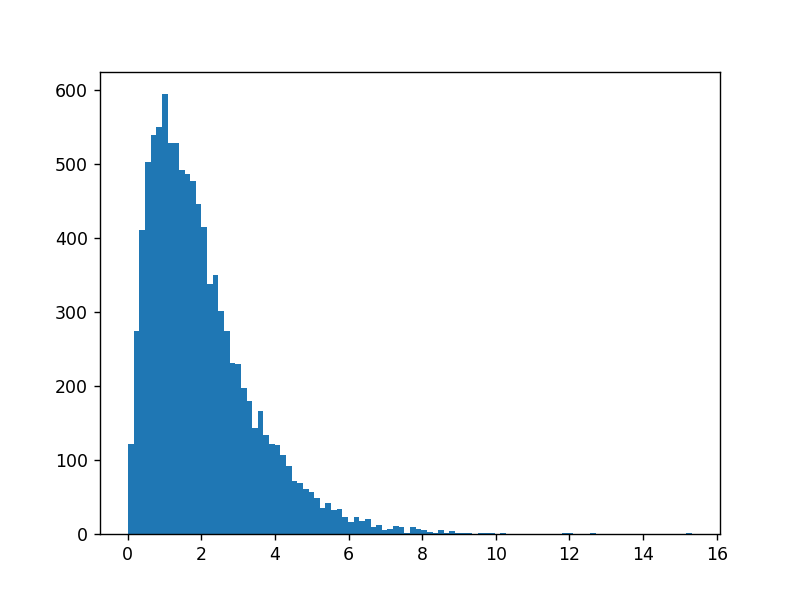

In [41]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


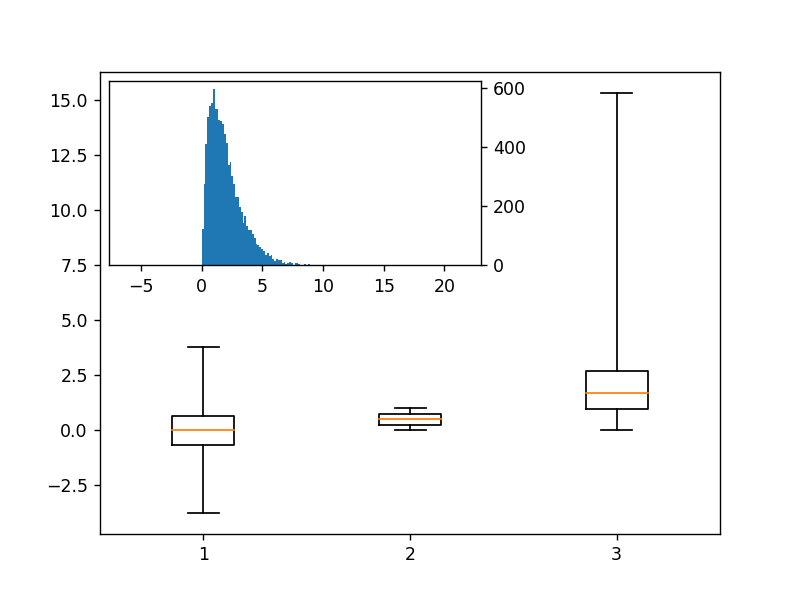

In [42]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0, 100])
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [43]:
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


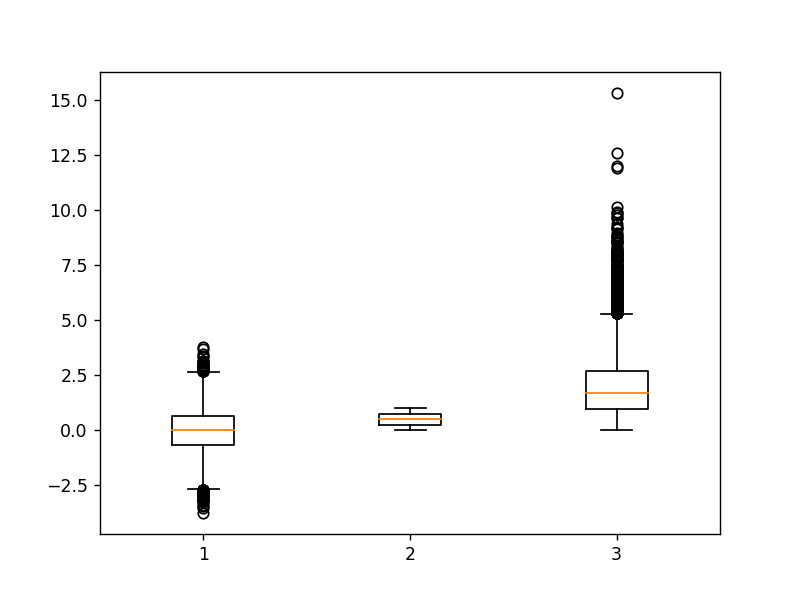

In [44]:
plt.figure()
_= plt.boxplot([df['normal'], df['random'], df['gamma']])

# Heatmaps

<IPython.core.display.Javascript object>


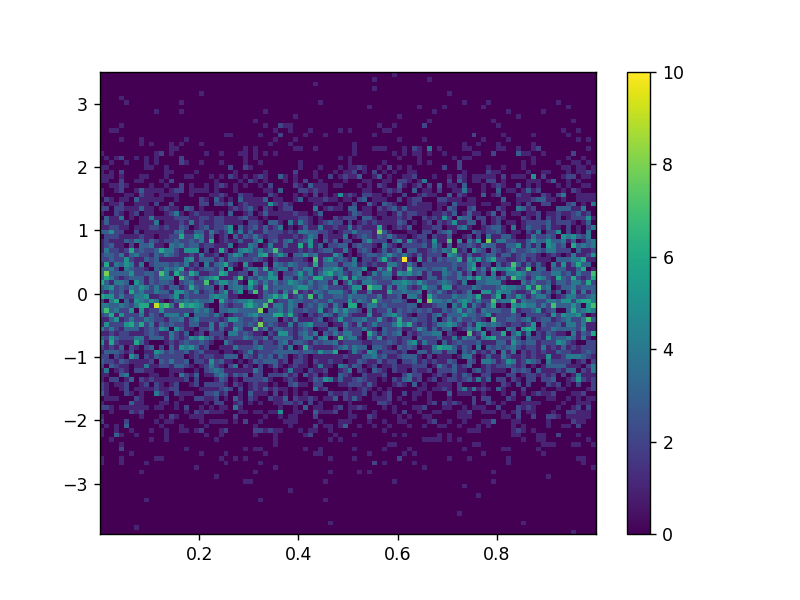

In [46]:
plt.figure()

y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)
_ = plt.hist2d(x,y, bins=100)

In [47]:
plt.colorbar()

# Animation

In [49]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [50]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


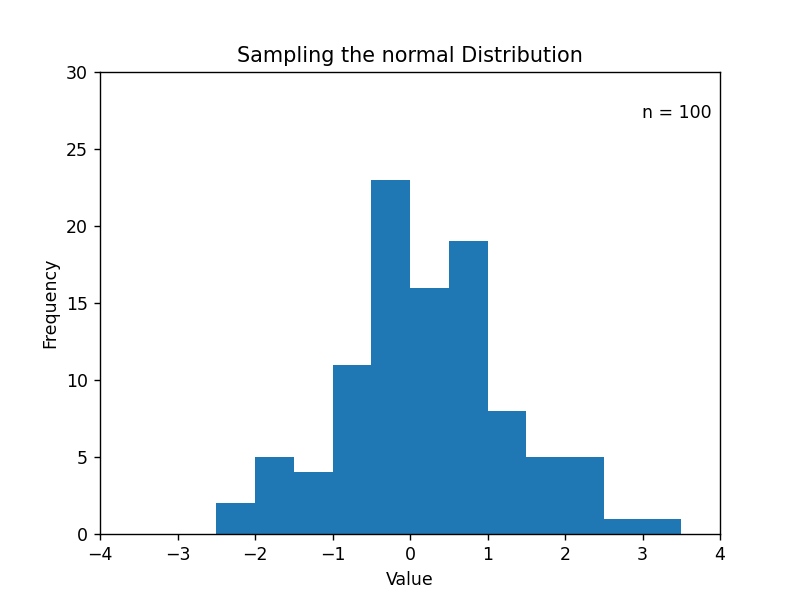

In [51]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


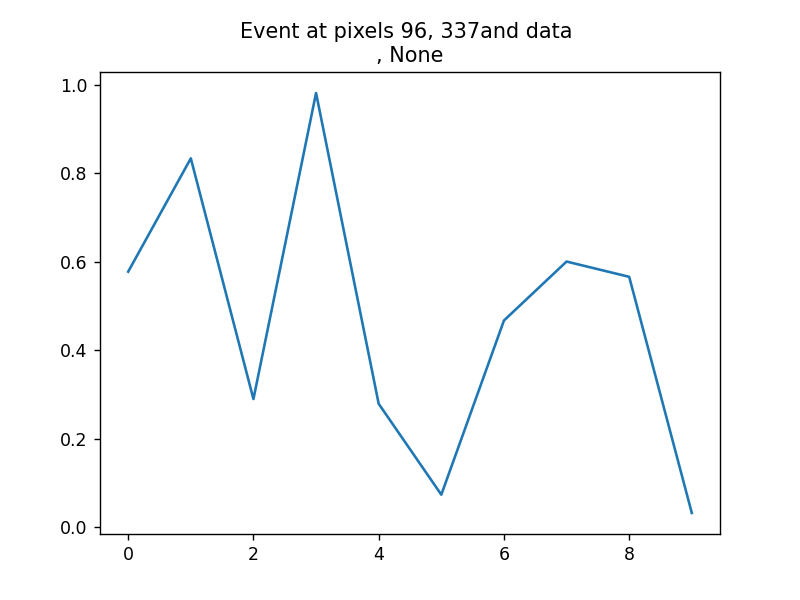

9

In [52]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {}and data {}, {}'.format(event.x, event.y, '\n', event.xdata, event.ydata))
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [53]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'Uk', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origins': origins})
df

,height,weight,origins
0,0.903137,0.999027,China
1,0.679182,0.348941,Brazil
2,0.520046,0.824198,Mexico
3,0.832557,0.772436,India
4,0.465549,0.374857,Uk
5,0.391905,0.021853,USA
6,0.390002,0.501481,Iraq
7,0.726792,0.597233,Germany
8,0.628730,0.006060,Chile
9,0.674119,0.613033,Canada


<IPython.core.display.Javascript object>


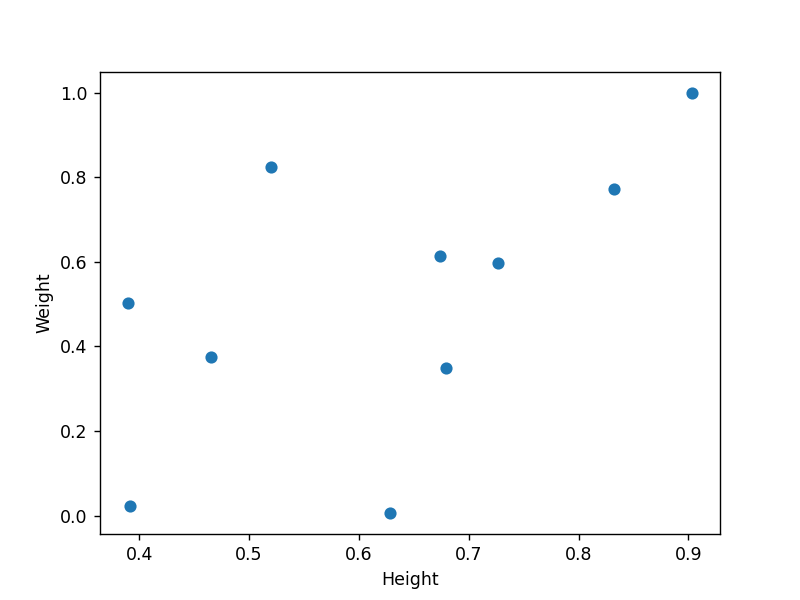

Text(0.5, 0, 'Height')

In [54]:
plt.figure()
plt.scatter(df.height, df.weight, picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [56]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
plt.gcf().canvas.mpl_connect('pick_event', onpick)

9